## Sales Prediction using Linear  Regression

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('sales.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Missing Value Treatment

In [6]:
df['Item_Weight'].fillna(value = df['Item_Weight'].mean(), inplace=True)

In [7]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [8]:
df['Outlet_Size'].fillna(value = df['Outlet_Size'].mode()[0], inplace=True)

In [9]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Removing repetitions and Label Encoding

In [14]:
le = LabelEncoder()

df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [17]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

In [18]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [19]:
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])

In [20]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [21]:
df['Item_Type'] = le.fit_transform(df['Item_Type'])

In [22]:
df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [23]:
df['Outlet_Size'] = df['Outlet_Size'].map({'Small': 0, 'Medium': 1, 'High': 2})

In [24]:
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])

In [25]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [26]:
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])

### Bivariate Analysis

Text(0, 0.5, 'Sales')

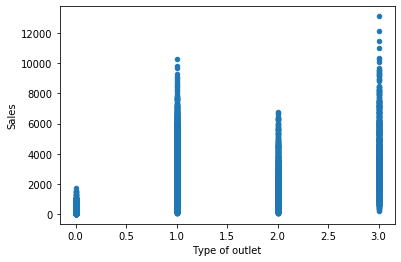

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot.scatter('Outlet_Type', 'Item_Outlet_Sales')
plt.xlabel('Type of outlet')
plt.ylabel('Sales')

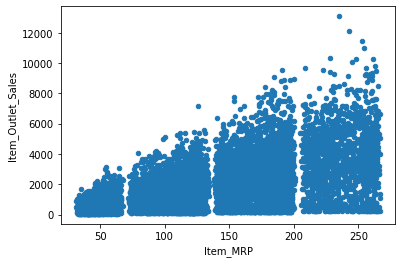

In [29]:
df.plot.scatter('Item_MRP', 'Item_Outlet_Sales')


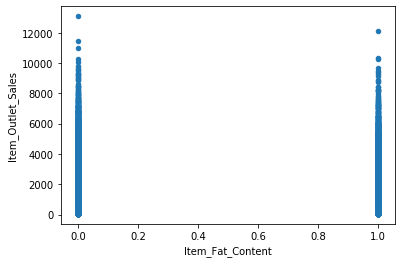

In [30]:
df.plot.scatter('Item_Fat_Content', 'Item_Outlet_Sales')

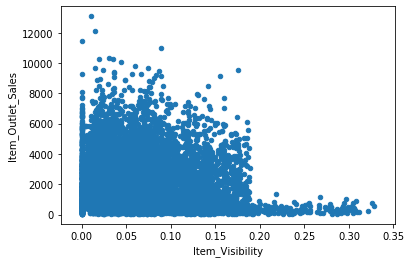

In [31]:
df.plot.scatter('Item_Visibility','Item_Outlet_Sales')

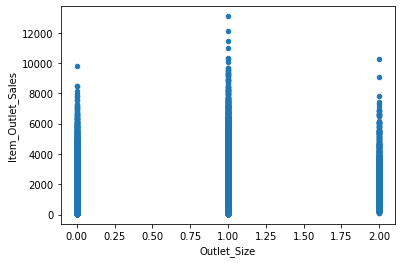

In [32]:
df.plot.scatter('Outlet_Size','Item_Outlet_Sales')

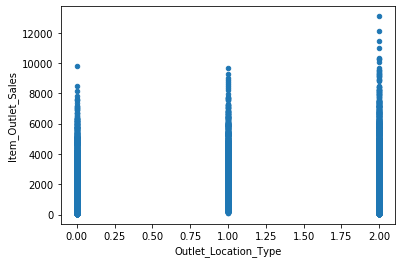

In [33]:
df.plot.scatter('Outlet_Location_Type', 'Item_Outlet_Sales')

### Model building

In [65]:
x = df.drop(columns = ['Item_Identifier','Outlet_Identifier', 'Outlet_Establishment_Year','Item_Outlet_Sales'], axis = 1)
y = df['Item_Outlet_Sales']
x.shape, y.shape

((8523, 8), (8523,))

In [71]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [72]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0,0.016047,4,249.8092,1,0,1
1,5.92,1,0.019278,14,48.2692,1,2,2
2,17.50,0,0.016760,10,141.6180,1,0,1
3,19.20,1,0.000000,6,182.0950,1,2,0
4,8.93,0,0.000000,9,53.8614,2,2,1


In [115]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.4, random_state = 42)

In [116]:
model = LR()
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
print('Coefficient of model: ', model.coef_)

Coefficient of model:  [-4.34148835e+00  7.30185813e+01 -1.84933327e+03  1.17015643e+00
  1.59490015e+01  3.71921938e+02 -4.37348782e+02  9.85471612e+02]


In [118]:
print('\nIntercept of model: ', model.intercept_)


Intercept of model:  -917.6753387440103


In [119]:
predict_train = model.predict(xtrain)
print('\nItem Outlet Sales on training data: ', predict_train)


Item Outlet Sales on training data:  [1354.20438898 3457.2264316   424.31053825 ... 3685.92639203 1709.82794077
 1502.89160636]


In [120]:
rmse_train = mean_squared_error(ytrain, predict_train)**(0.5)
print('\nRMSE on train dataset : ', rmse_train)



RMSE on train dataset :  1214.8613562129203


In [121]:
predict_test = model.predict(xtest)
print('\nItem Outlet Sales on test data: ', predict_test)


Item Outlet Sales on test data:  [1098.90537779  592.33511909 1047.47595034 ... 1017.02413905 1714.02903645
 1485.99804541]


In [122]:
rmse_test = mean_squared_error(ytest, predict_test)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)



RMSE on test dataset :  1171.4249180469865
